In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Plot temperature and precipitation mean changes on globe

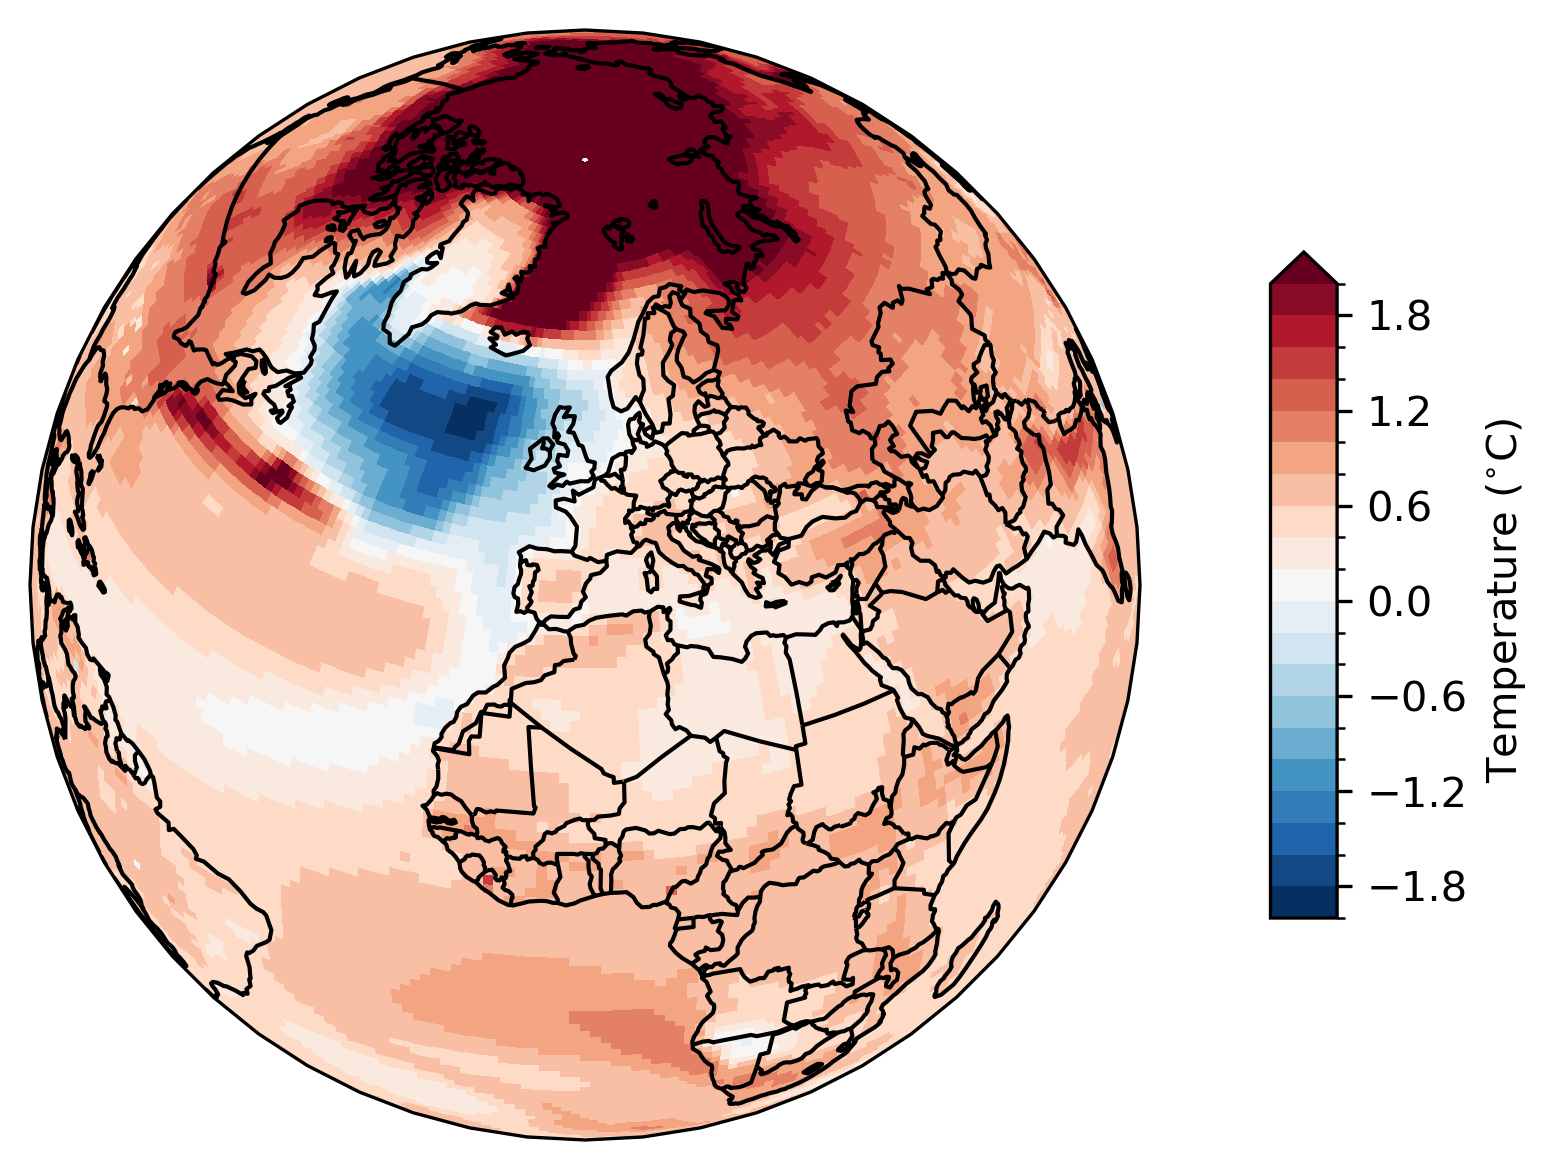

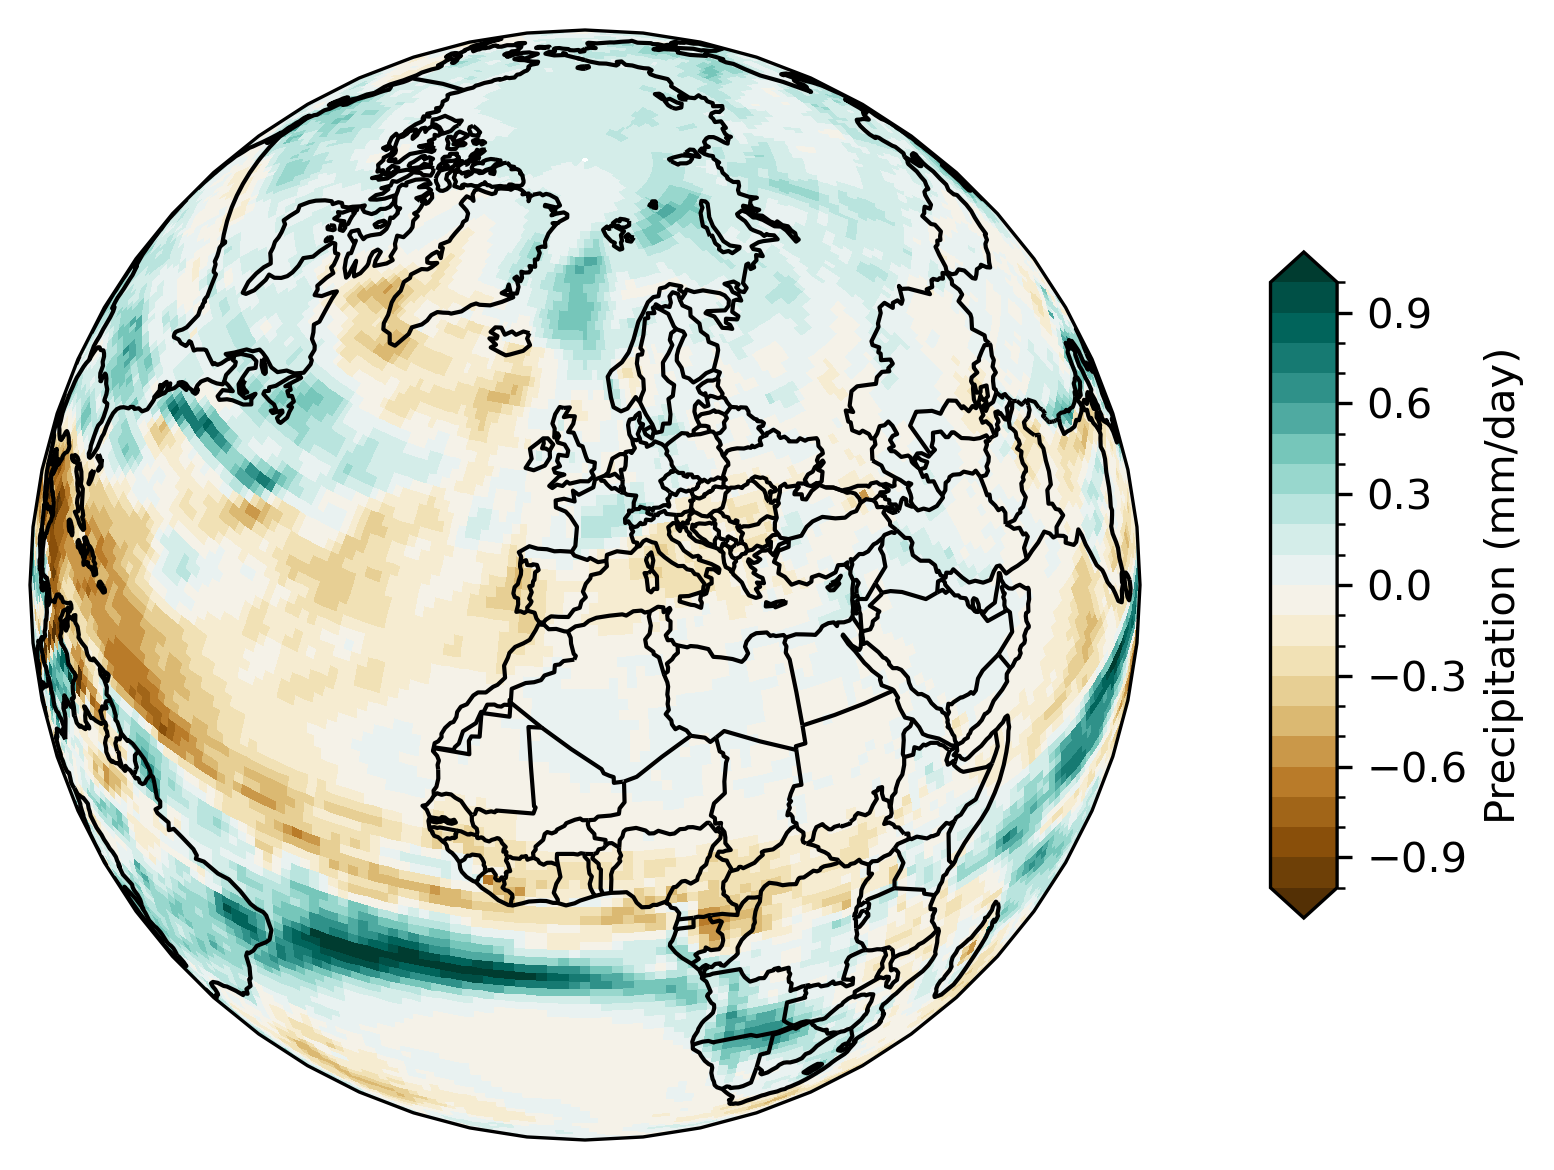

In [22]:
# Plot temperature

model_scenario_name = 'MRI-ESM2-0_ssp245'
start_time = '2015-01-01'; end_time = '2060-01-01'
data_folder = '../CMIP6_data/'
files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
SPG_ds = xr.open_mfdataset(files)


lmax_tas = 2
levels = np.linspace(-lmax_tas, lmax_tas, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
SPG_mean_pre = SPG_ds.tas.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')
SPG_mean_post = SPG_ds.tas.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = SPG_mean_post-SPG_mean_pre


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Temperature ($^{\circ}$C)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

# Plot precipitation

files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
files.sort()
SPG_ds = xr.open_mfdataset(files)


lmax_pr = 1
levels = np.linspace(-lmax_pr, lmax_pr, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
SPG_mean_pre = SPG_ds.pr.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')
SPG_mean_post = SPG_ds.pr.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = (SPG_mean_post-SPG_mean_pre)*24*60*60


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='BrBG',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Precipitation (mm/day)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()


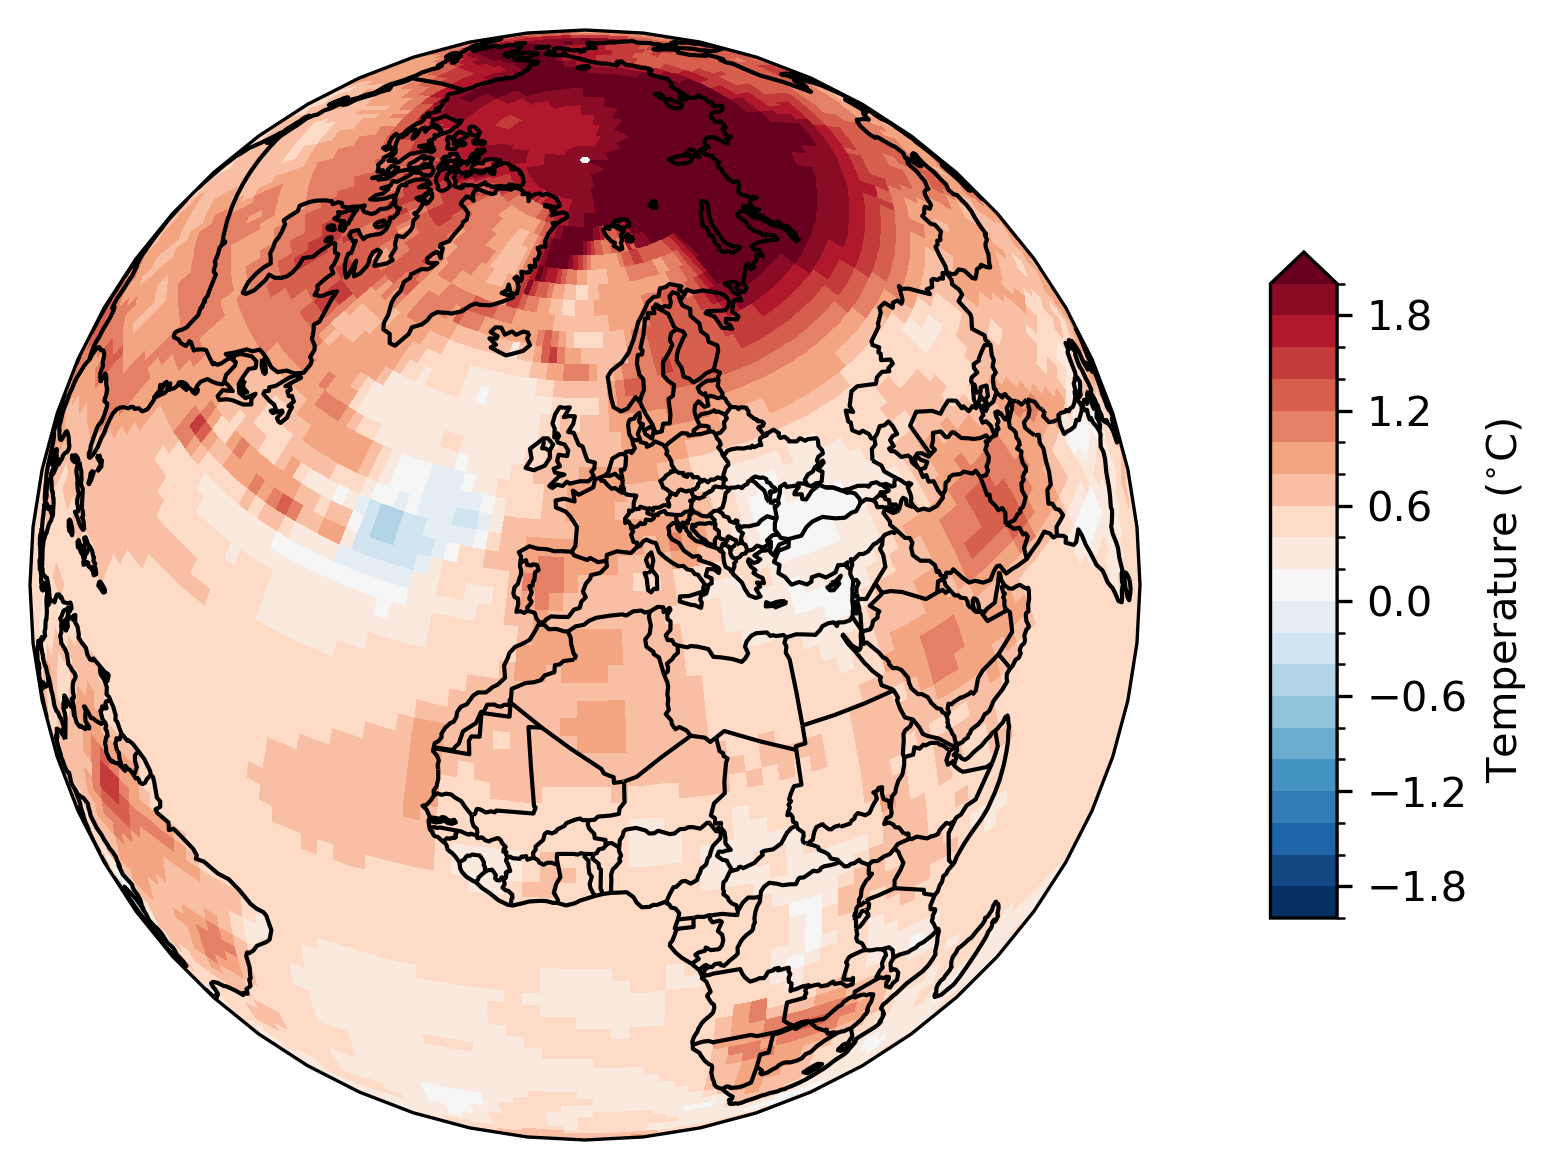

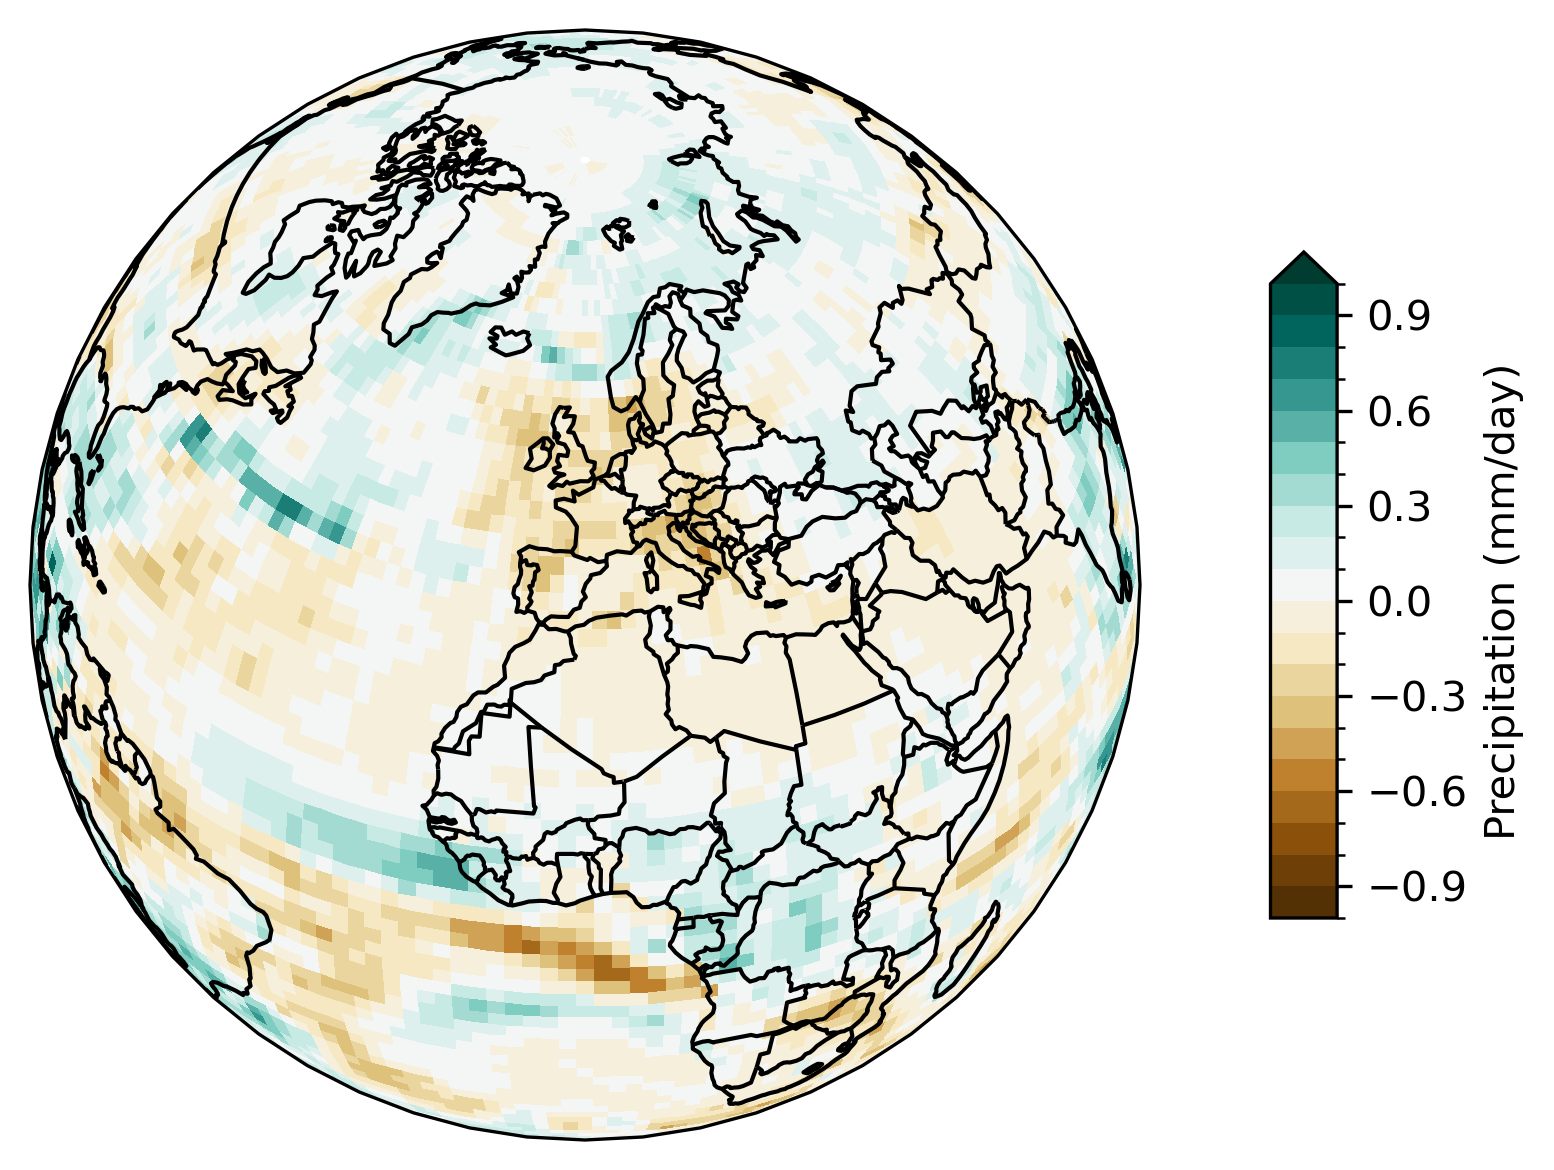

In [43]:
# Plot temperature
model_scenario_name = 'MPI-ESM1-2-LR_ssp245'
start_time = '2015-01-01'; end_time = '2060-01-01'
data_folder = '../CMIP6_data/'
files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
non_SPG_ds = xr.open_mfdataset(files)


lmax_tas = 2
levels = np.linspace(-lmax_tas, lmax_tas, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
non_SPG_mean_pre = non_SPG_ds.tas.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')
non_SPG_mean_post = non_SPG_ds.tas.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = non_SPG_mean_post-non_SPG_mean_pre
#if area_name == 'europe':
#    diff = diff.reindex({'lon':pr.lon})
#    ax.set_xlim([-50, 33])

map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Temperature ($^{\circ}$C)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

# Plot precipitation
files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
files.sort()
non_SPG_ds = xr.open_mfdataset(files)


lmax_pr = 1
levels = np.linspace(-lmax_pr, lmax_pr, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
non_SPG_mean_pre = non_SPG_ds.pr.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')
non_SPG_mean_post = non_SPG_ds.pr.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = (non_SPG_mean_post-non_SPG_mean_pre)*24*60*60


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='BrBG',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Precipitation (mm/day)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

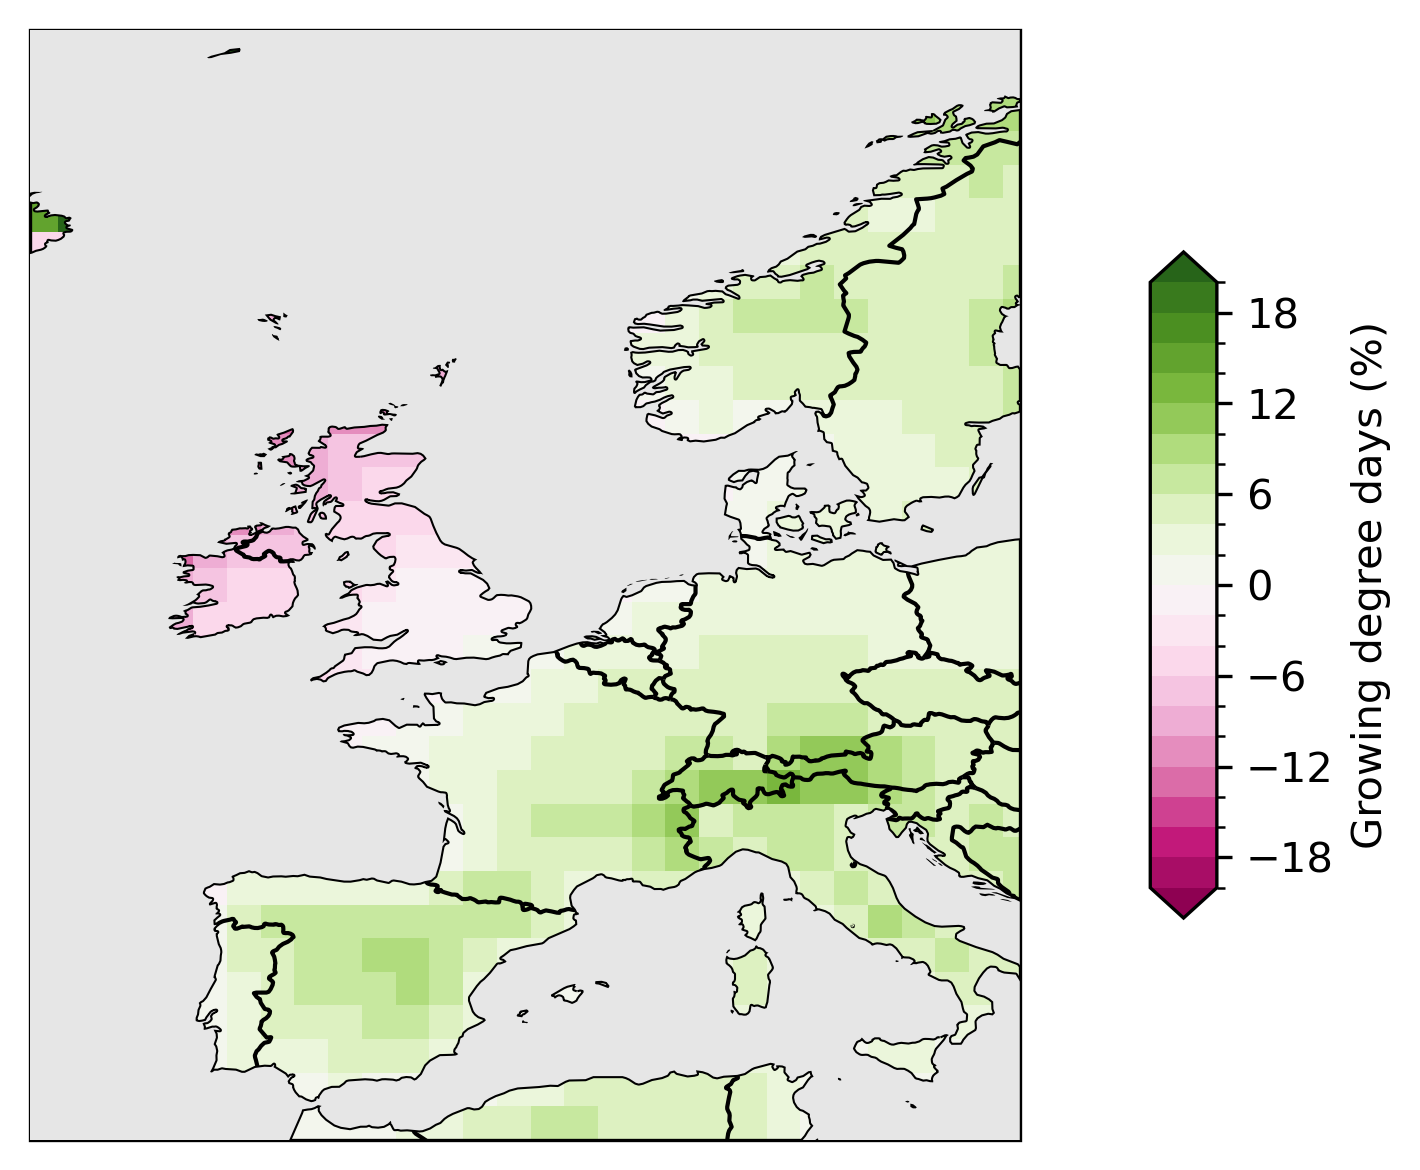

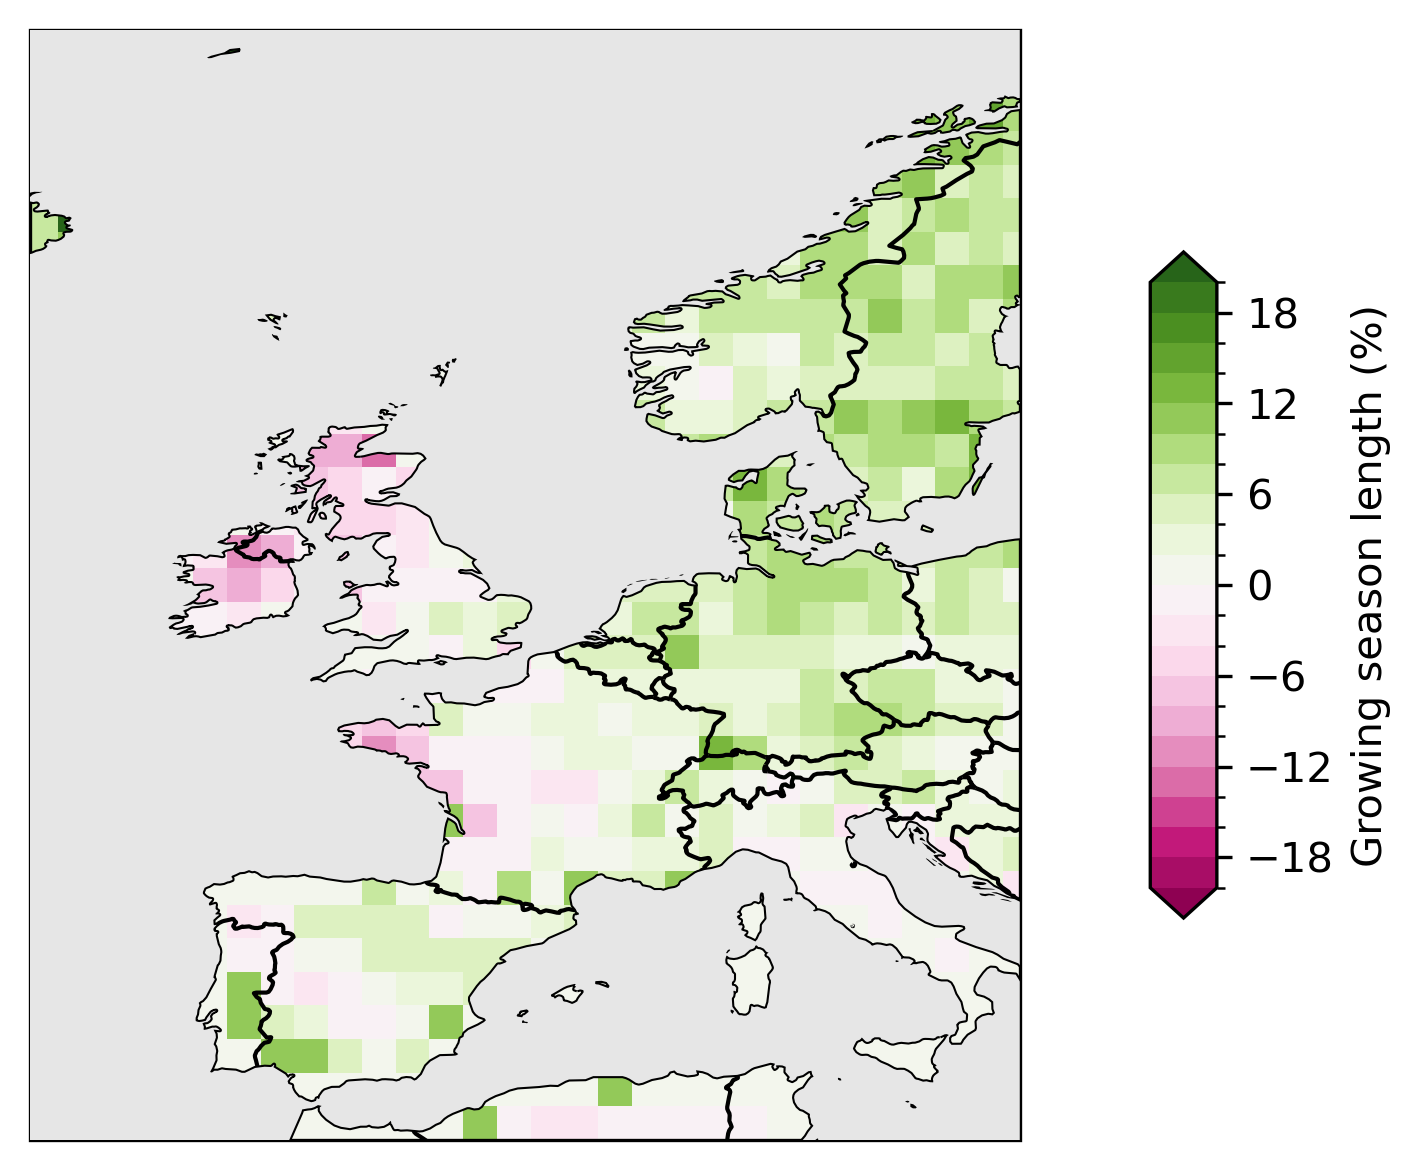

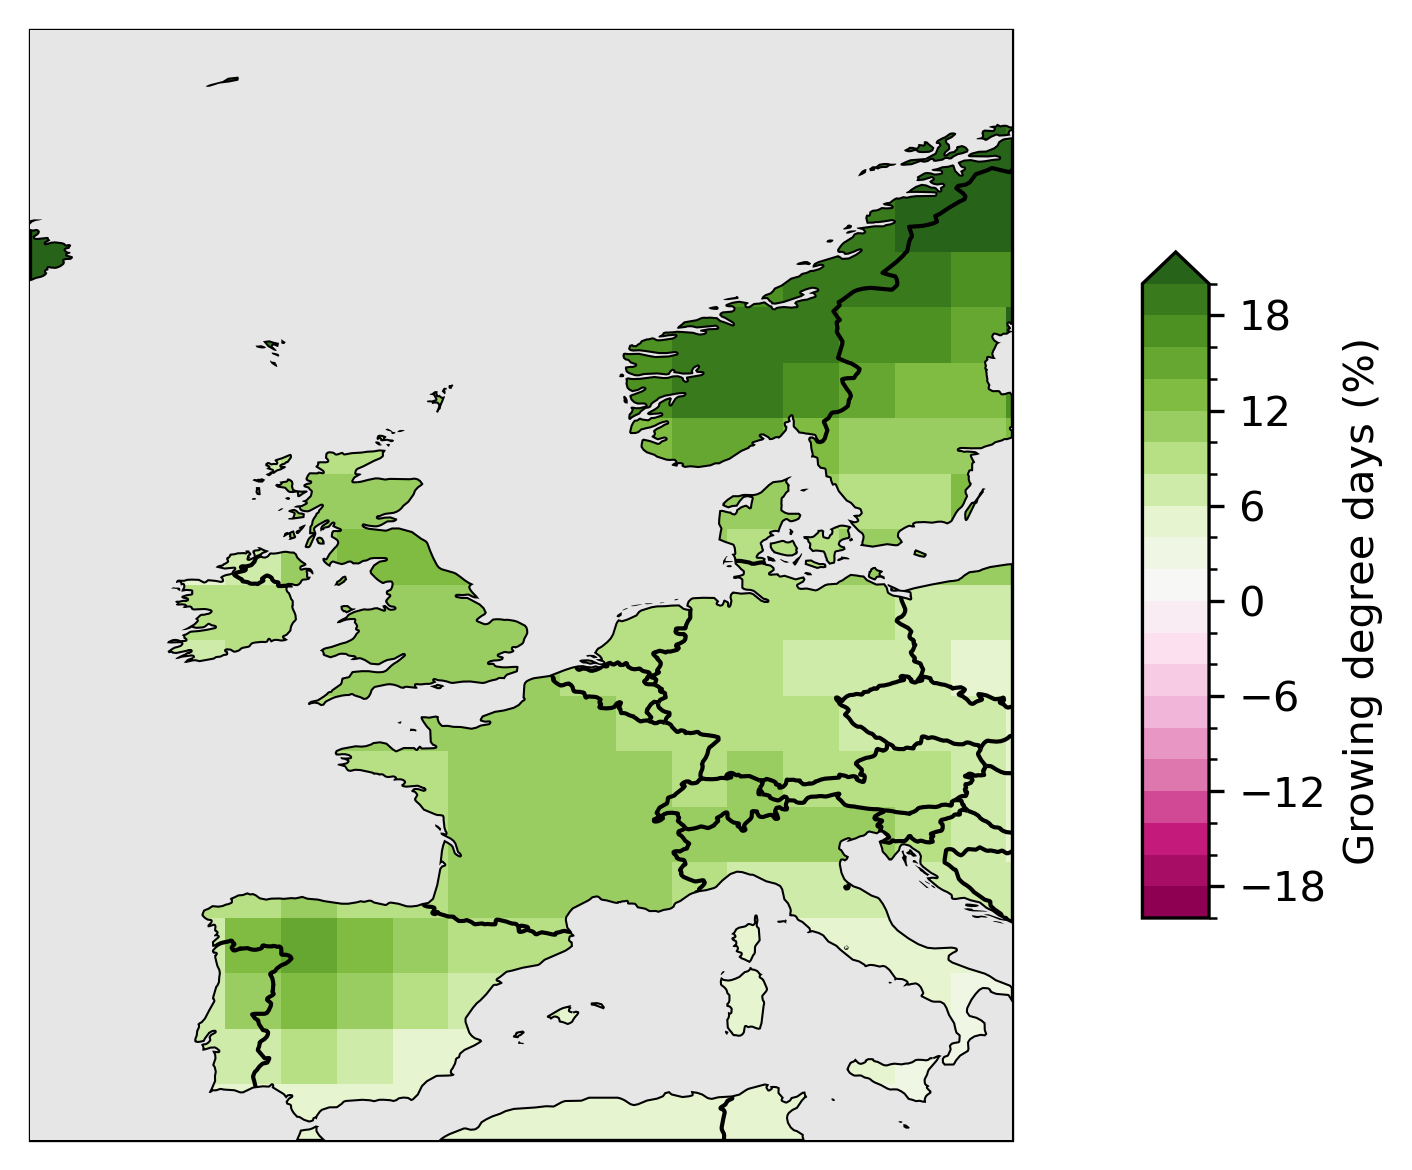

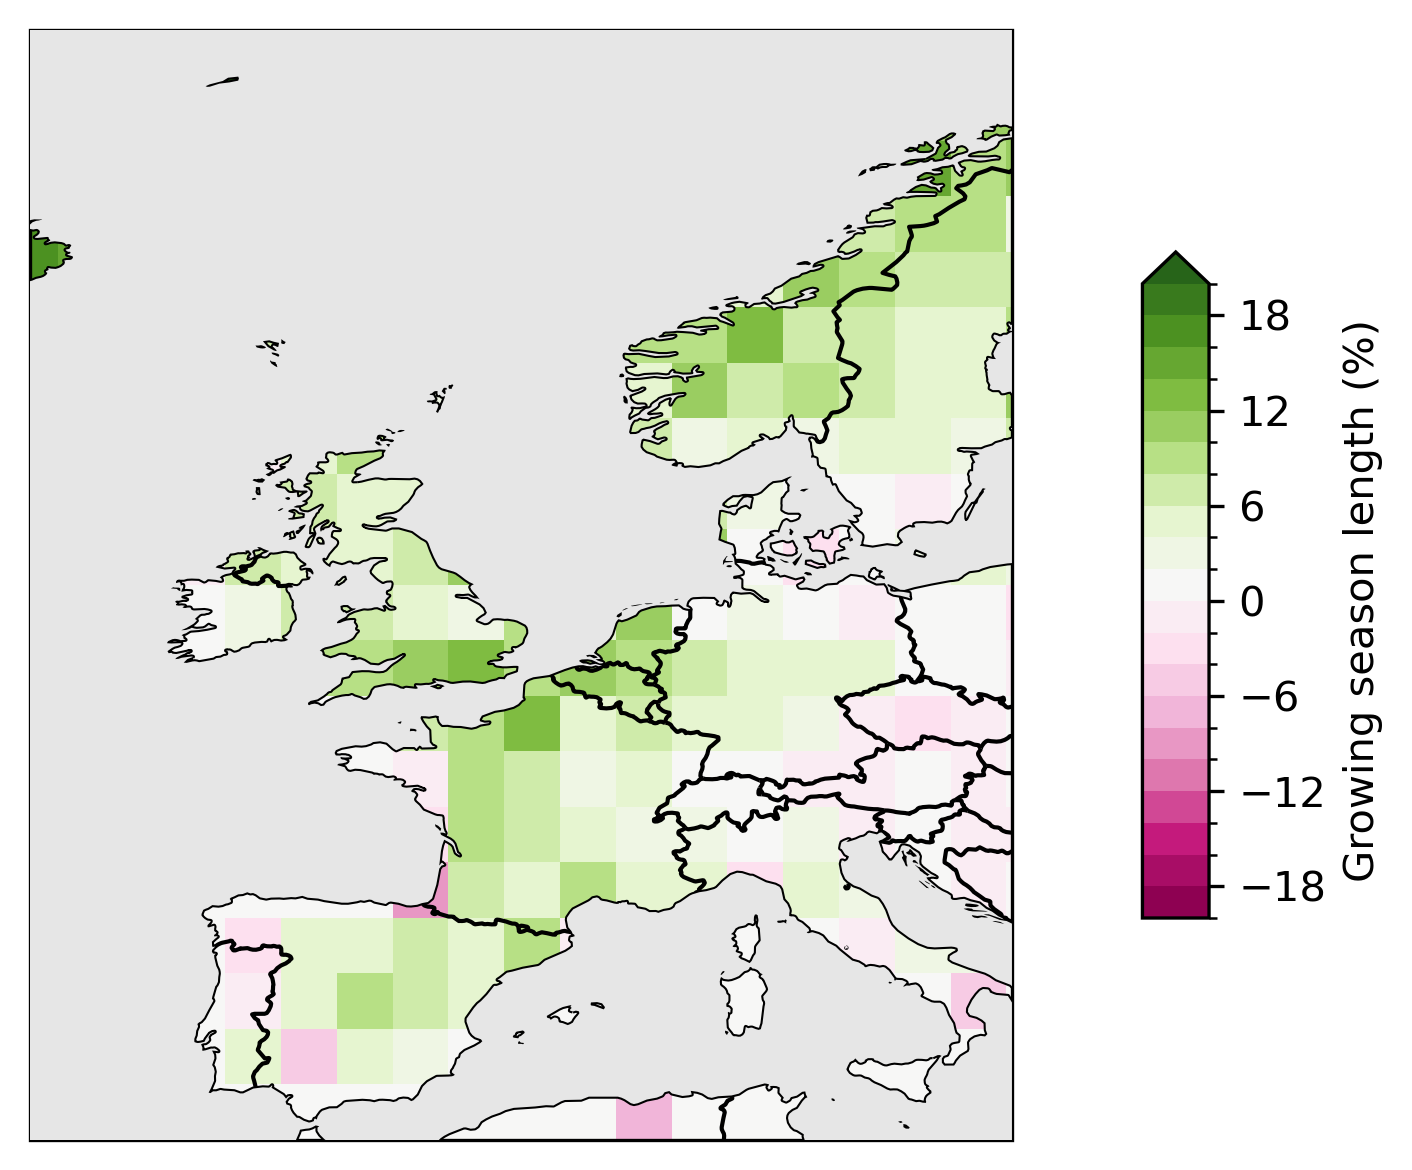

In [ ]:
data_folder = '../climatic_indices/'
area_name = 'europe'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']
save_folder = '../figures/presentation/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

for model_scenario_name in model_scenario_names:
    clim_idx = xr.open_mfdataset(data_folder+'*_'+area_name+'_'+model_scenario_name+'.nc', decode_timedelta=False)
    clim_idx.load()

    # Choose variables

    variable_list=['GDD_v2', 'GSL_v3']
    reldiff = 'True'
    if reldiff == 'True':
        level_list = [20, 20]
        label_list = [' (%)', ' (%)']
    else:
        level_list = [100, 50]
        label_list = ['( $^{\circ}$C)', ' (days)']

    # Plotting

    for variable, lmax, label in zip(variable_list, level_list, label_list):
        levels = np.linspace(-lmax, lmax, 21)
        fig = plt.figure(figsize=[9, 4], dpi=300)
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        diff = clim_idx[variable].isel(time=slice(25,45)).mean("time") - clim_idx[variable].isel(time=slice(0,20)).mean("time")
        if area_name == 'europe':
            diff = diff.reindex({'lon':np.arange(0, 360, clim_idx.lon[1]-clim_idx.lon[0])})
            ax.set_xlim([-15, 18])
        if reldiff == 'True':
            diff = diff/ clim_idx[variable].isel(time=slice(0,20)).mean("time") * 100
            label = clim_idx[variable].description + label
        else:
            label = clim_idx[variable].description + label
        map = diff.plot(ax=ax, 
                    transform=ccrs.PlateCarree(),levels=levels, cmap='PiYG',
                    cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':label})
        ax.coastlines()
        ax.add_feature(cFeature.BORDERS,)
        ax.add_feature(cFeature.OCEAN,zorder=10,facecolor=(0.9,0.9,0.9))
        fig.tight_layout()
        if reldiff == 'True':
            plt.savefig(save_folder+'reldiff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        else:
            plt.savefig(save_folder+'diff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        plt.show()

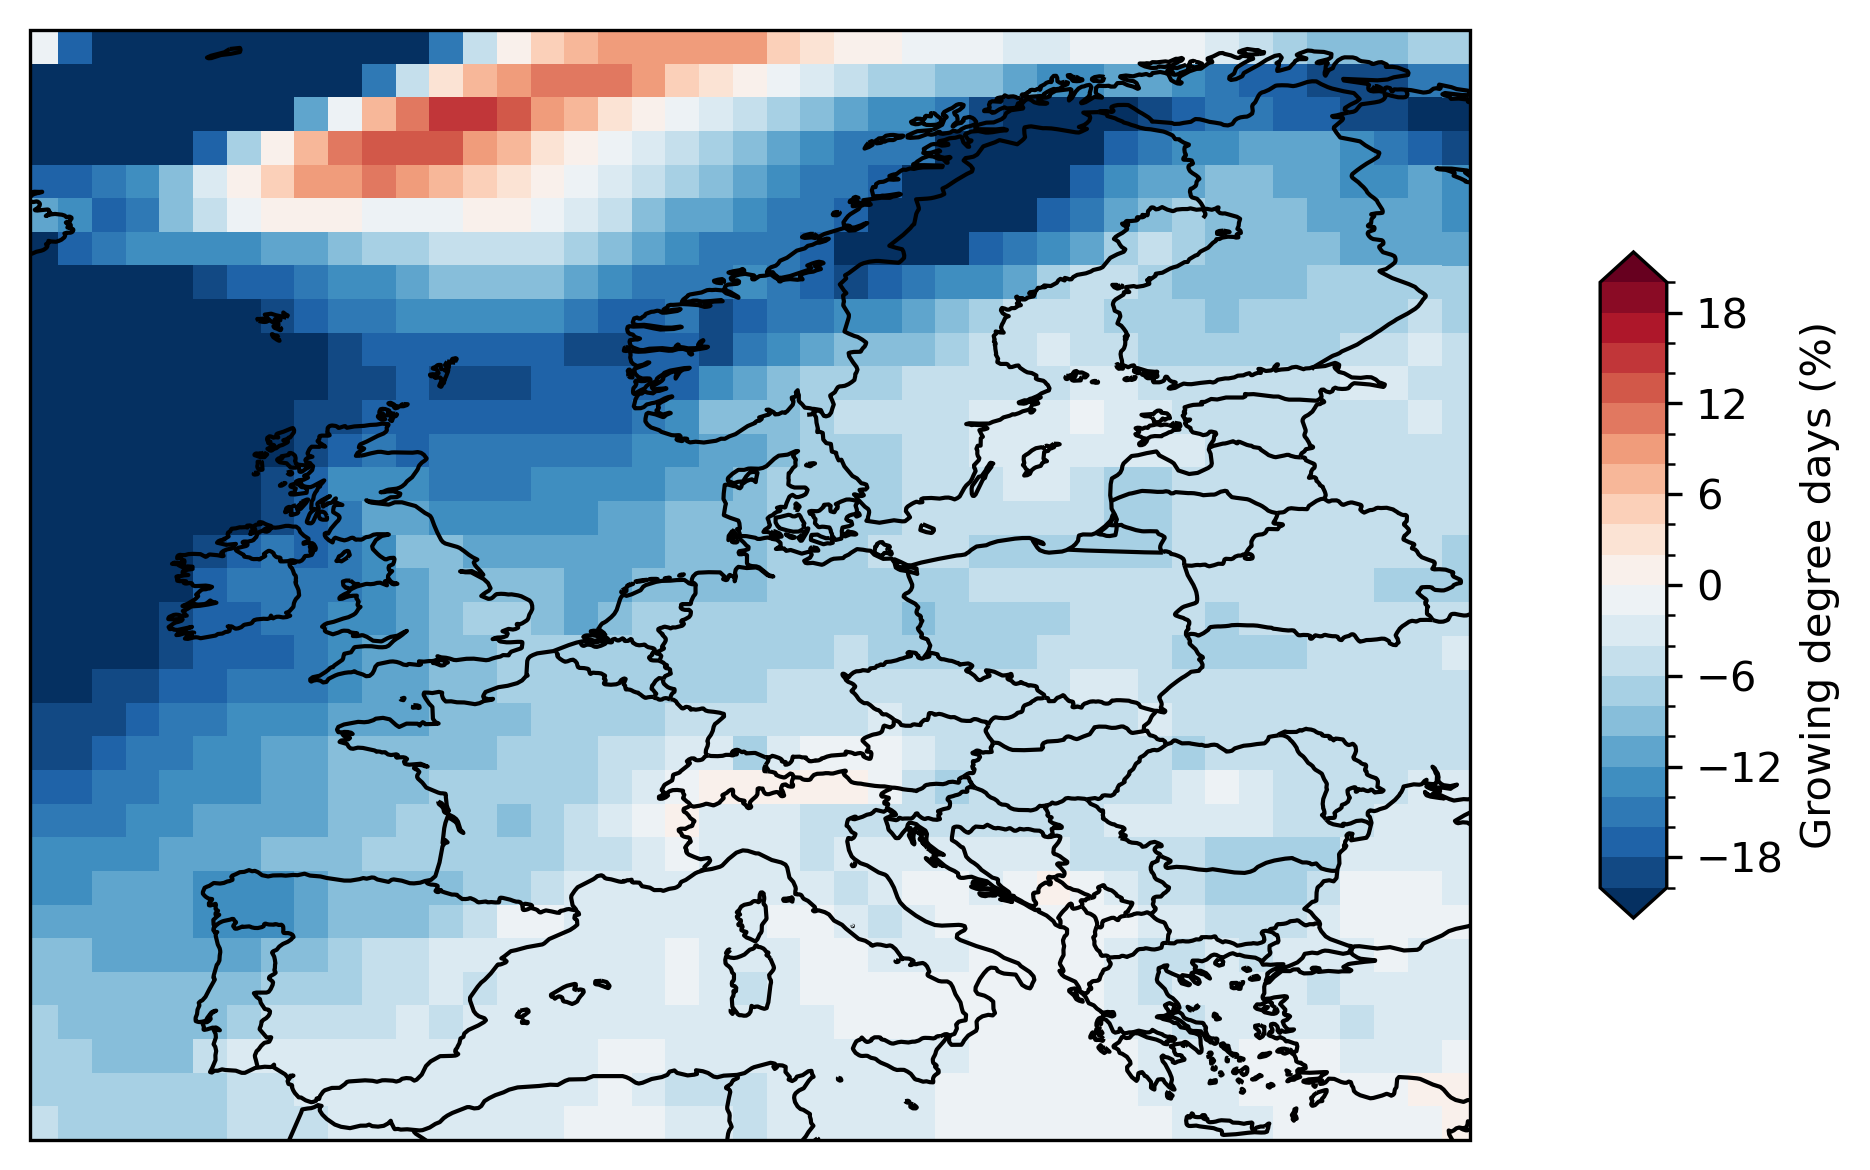

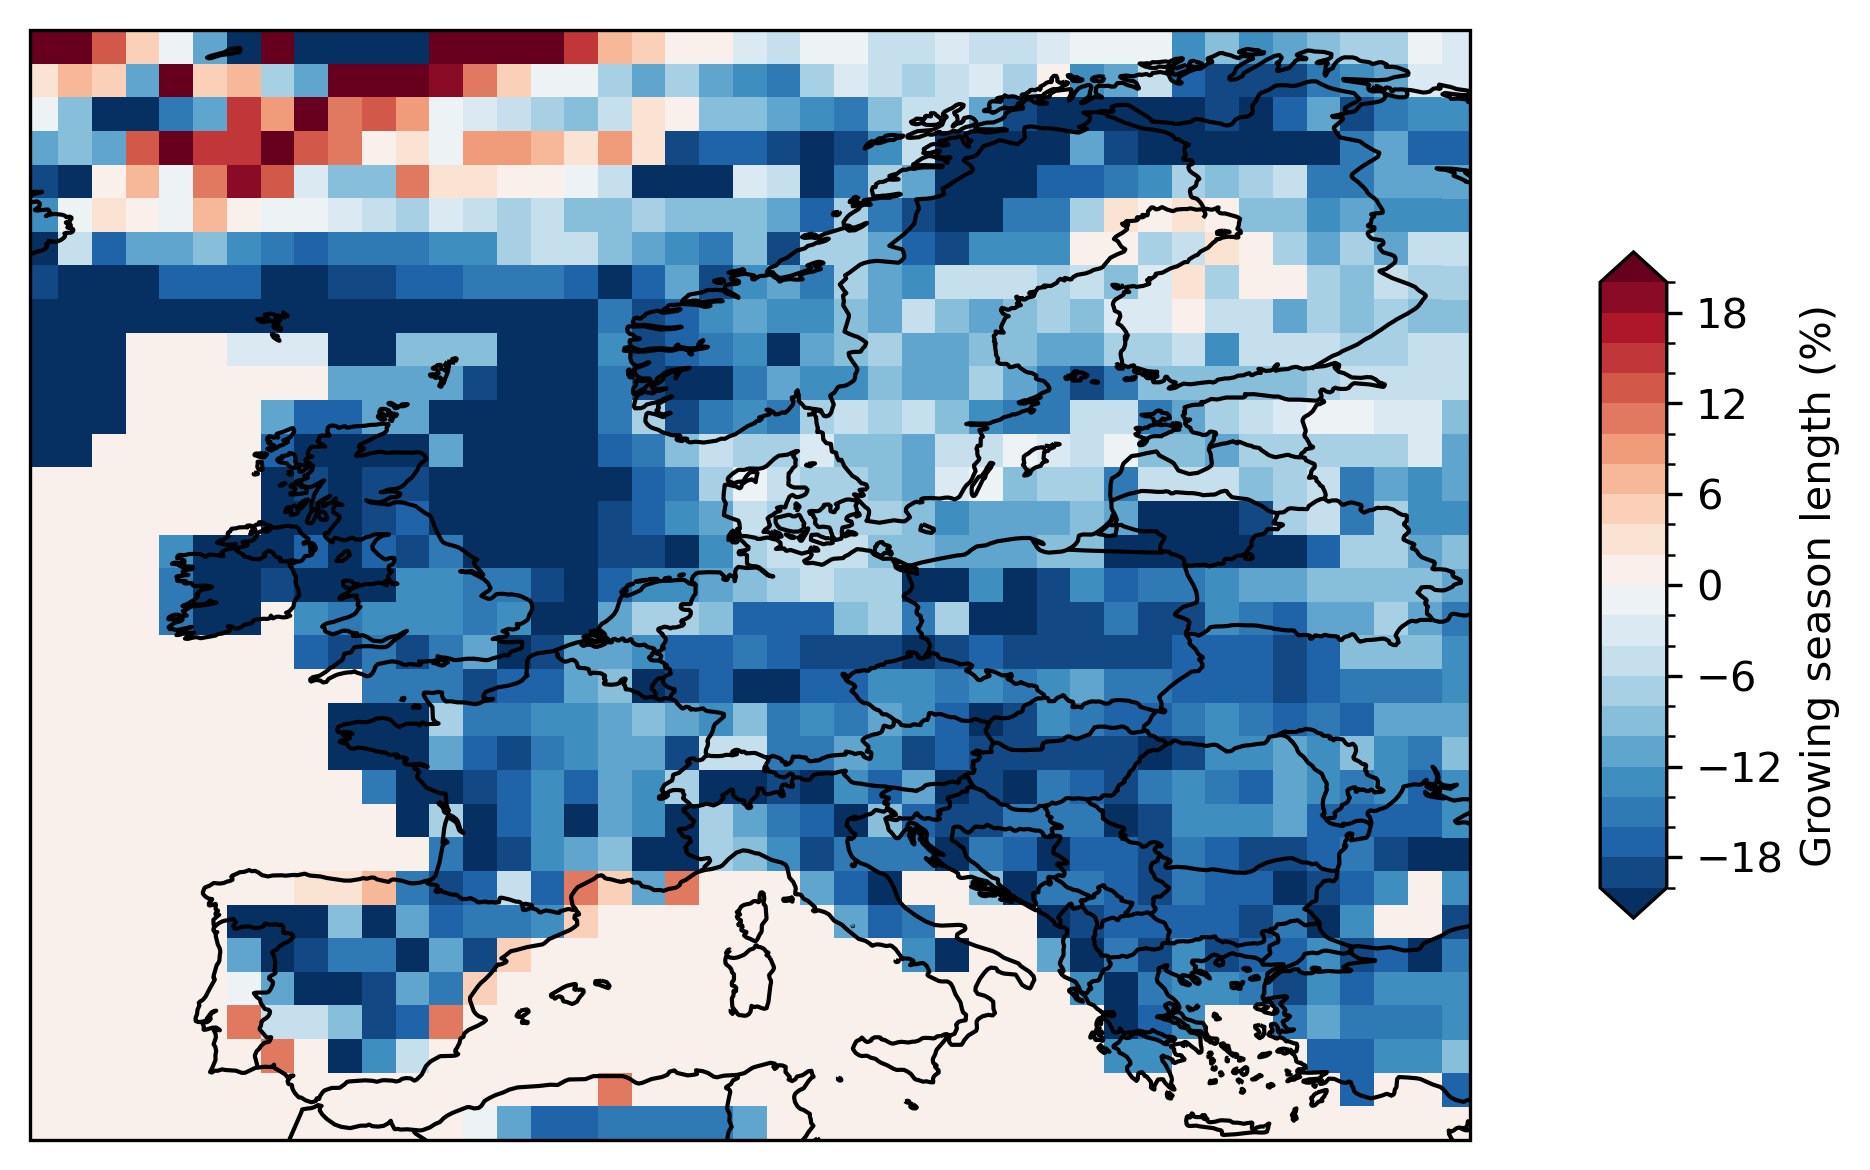

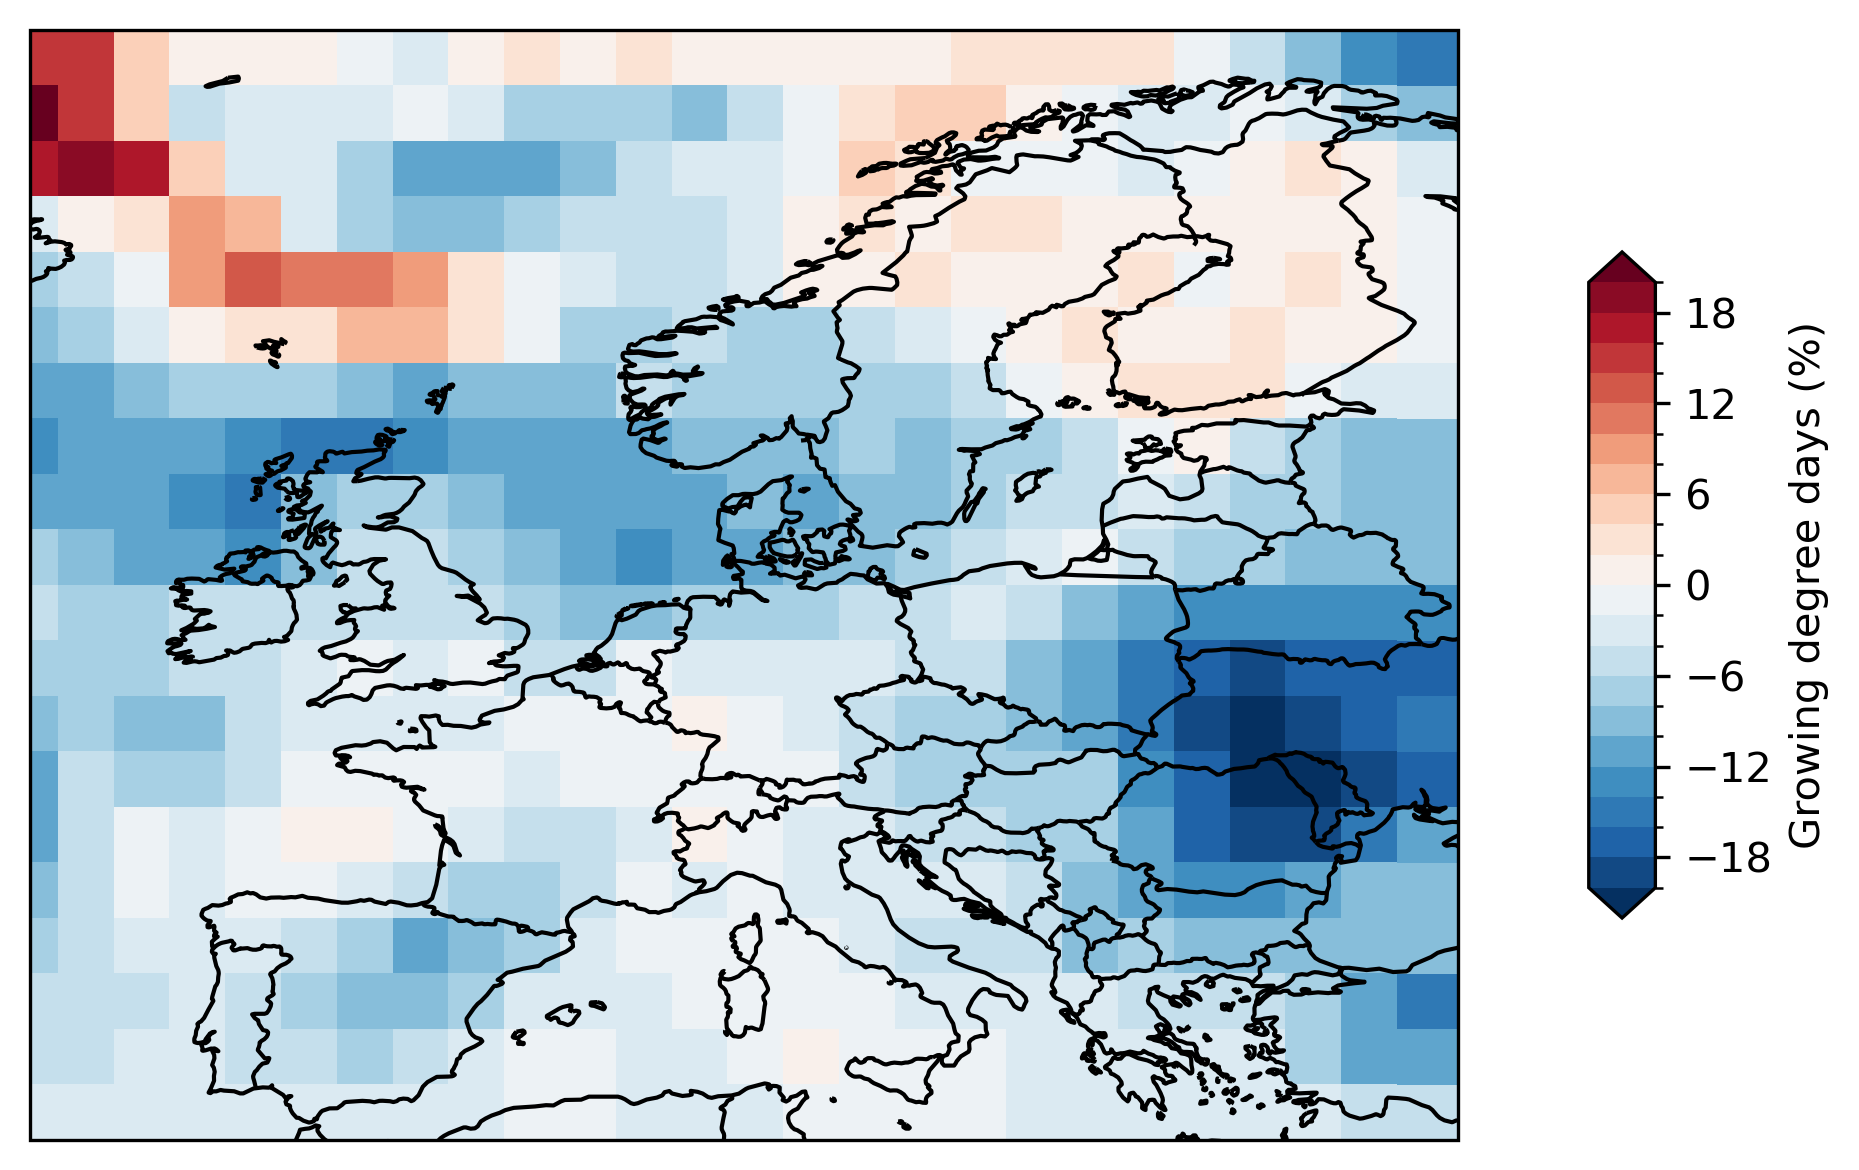

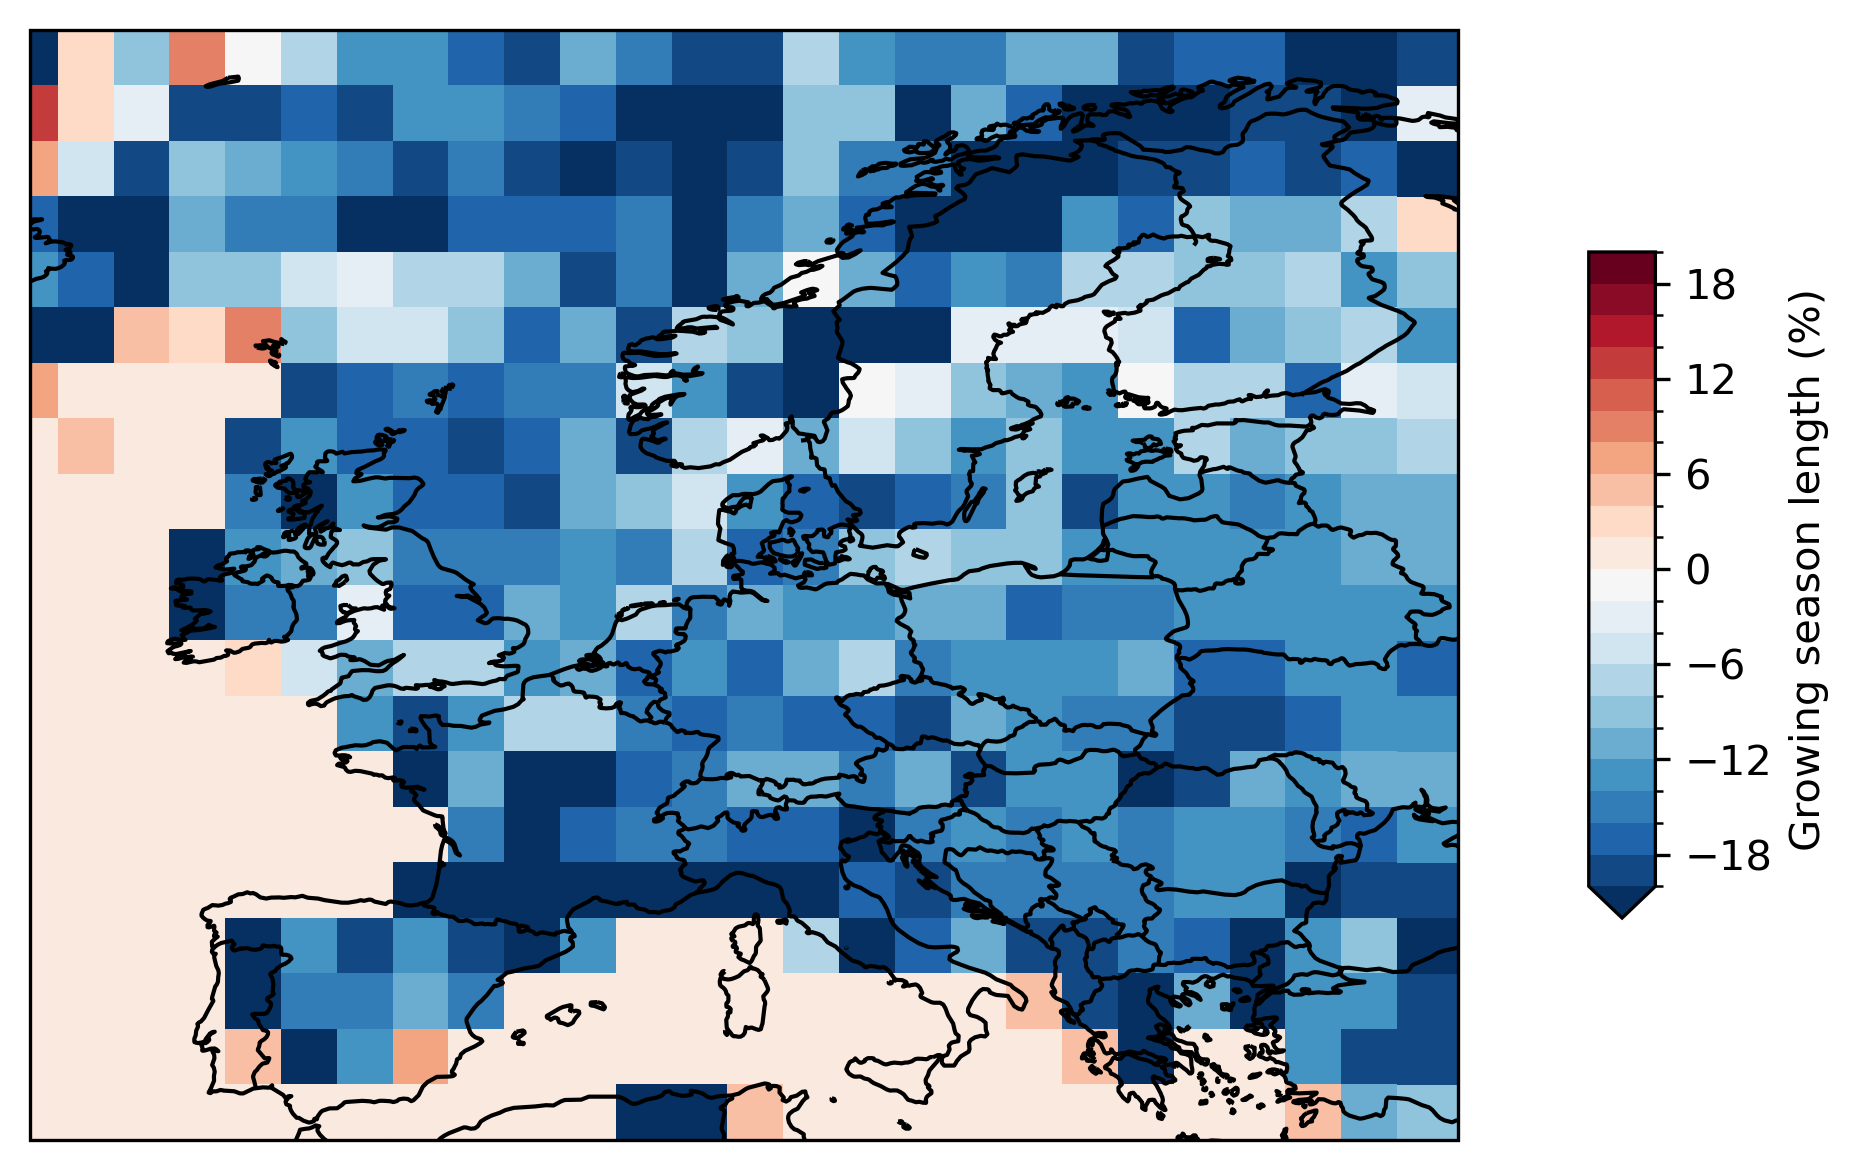

In [ ]:
data_folder = '../climatic_indices/'
area_name = 'europe'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']

for model_scenario_name in model_scenario_names:
    clim_idx = xr.open_mfdataset(data_folder+'*_'+area_name+'_'+model_scenario_name+'.nc', decode_timedelta=False)
    clim_idx.load()
    save_folder = '../figures/presentation/' # Folder where figures should be saved
    os.makedirs(save_folder, exist_ok=True) 

    # Choose variables

    variable_list=['GDD_v2', 'GSL_v3']
    reldiff = 'True'
    if reldiff == 'True':
        level_list = [20, 20]
        label_list = [' (%)', ' (%)']
    else:
        level_list = [100, 50]
        label_list = ['( $^{\circ}$C)', ' (days)']

    # Plotting

    for variable, lmax, label in zip(variable_list, level_list, label_list):
        levels = np.linspace(-lmax, lmax, 21)
        fig = plt.figure(figsize=[9, 4], dpi=300)
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        diff = clim_idx[variable].isel(time=slice(25,40)).min("time") - clim_idx[variable].isel(time=slice(0,20)).mean("time")
        if area_name == 'europe':
            diff = diff.reindex({'lon':np.arange(0, 360, clim_idx.lon[1]-clim_idx.lon[0])})
            ax.set_xlim([-15, 33])
        if reldiff == 'True':
            diff = diff/ clim_idx[variable].isel(time=slice(0,20)).mean("time") * 100
            label = clim_idx[variable].description + label
        else:
            label = clim_idx[variable].description + label
        map = diff.plot(ax=ax, 
                    transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',
                    cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':label})
        ax.coastlines()
        ax.add_feature(cFeature.BORDERS)
        fig.tight_layout()
        if reldiff == 'True':
            plt.savefig(save_folder+'reldiff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        else:
            plt.savefig(save_folder+'diff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        plt.show()

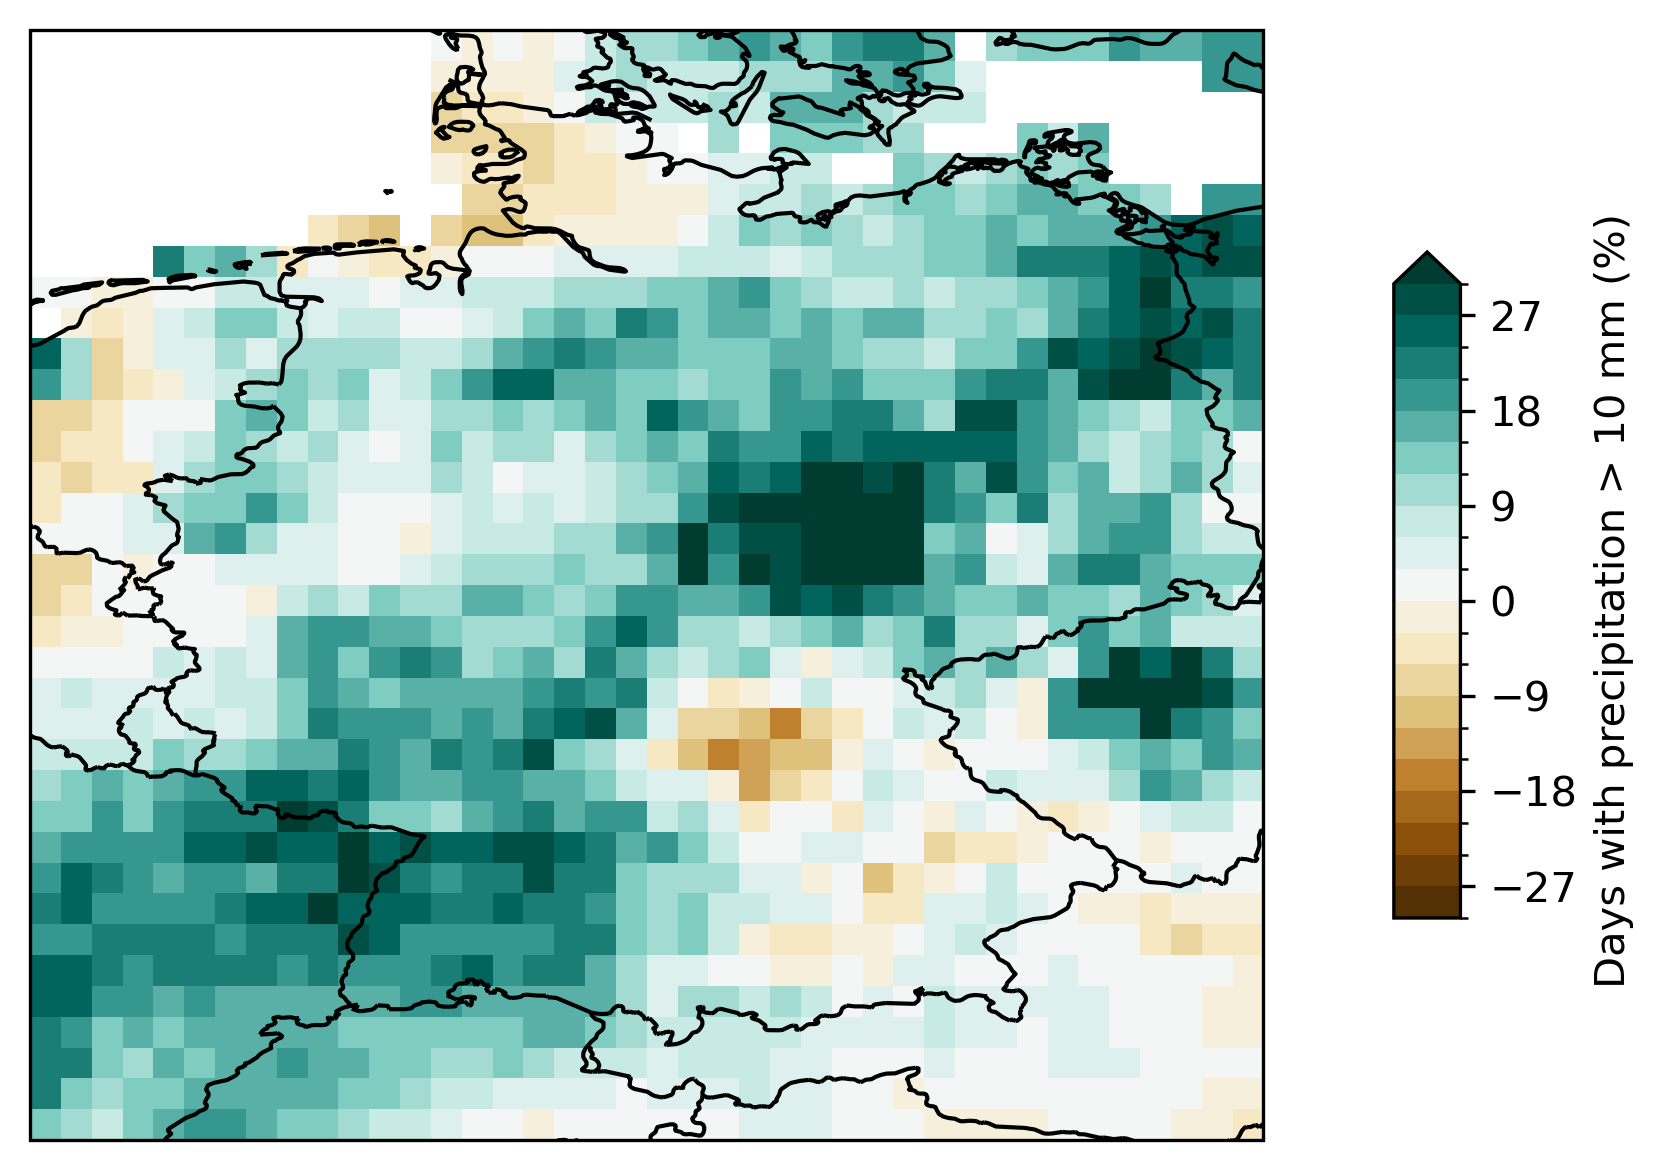

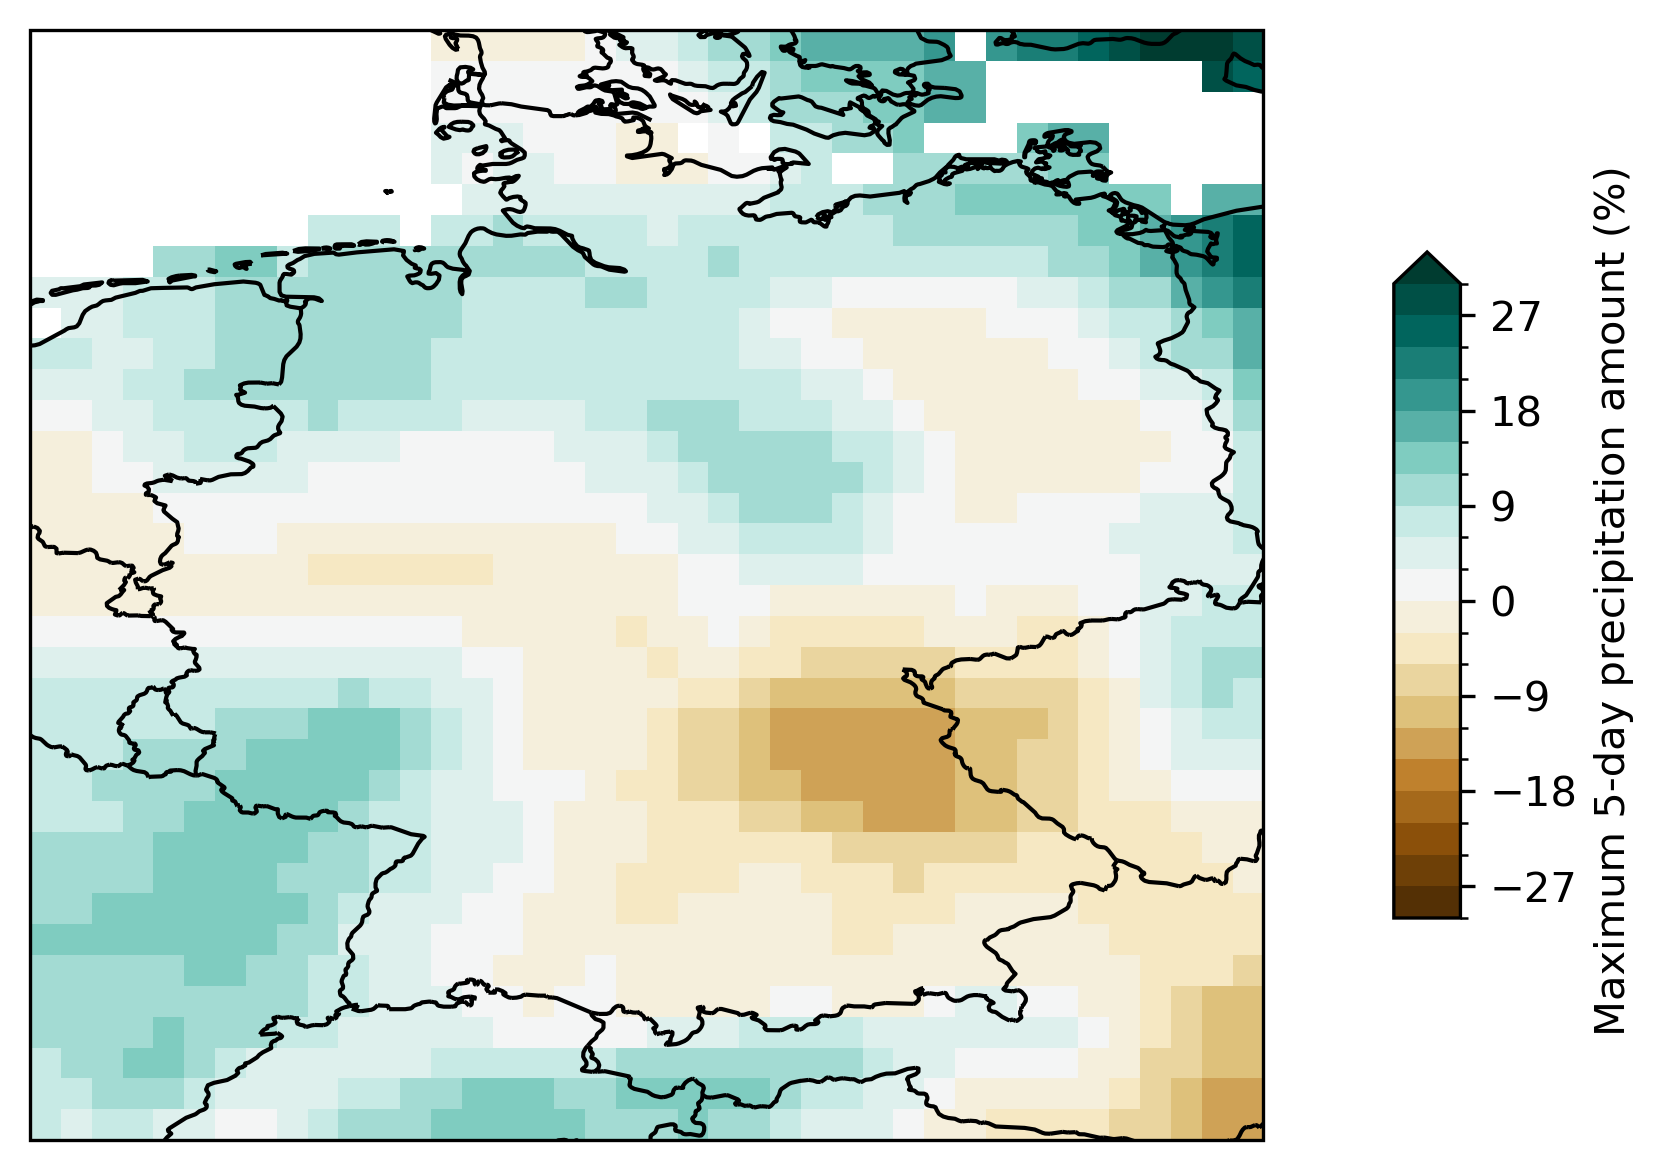

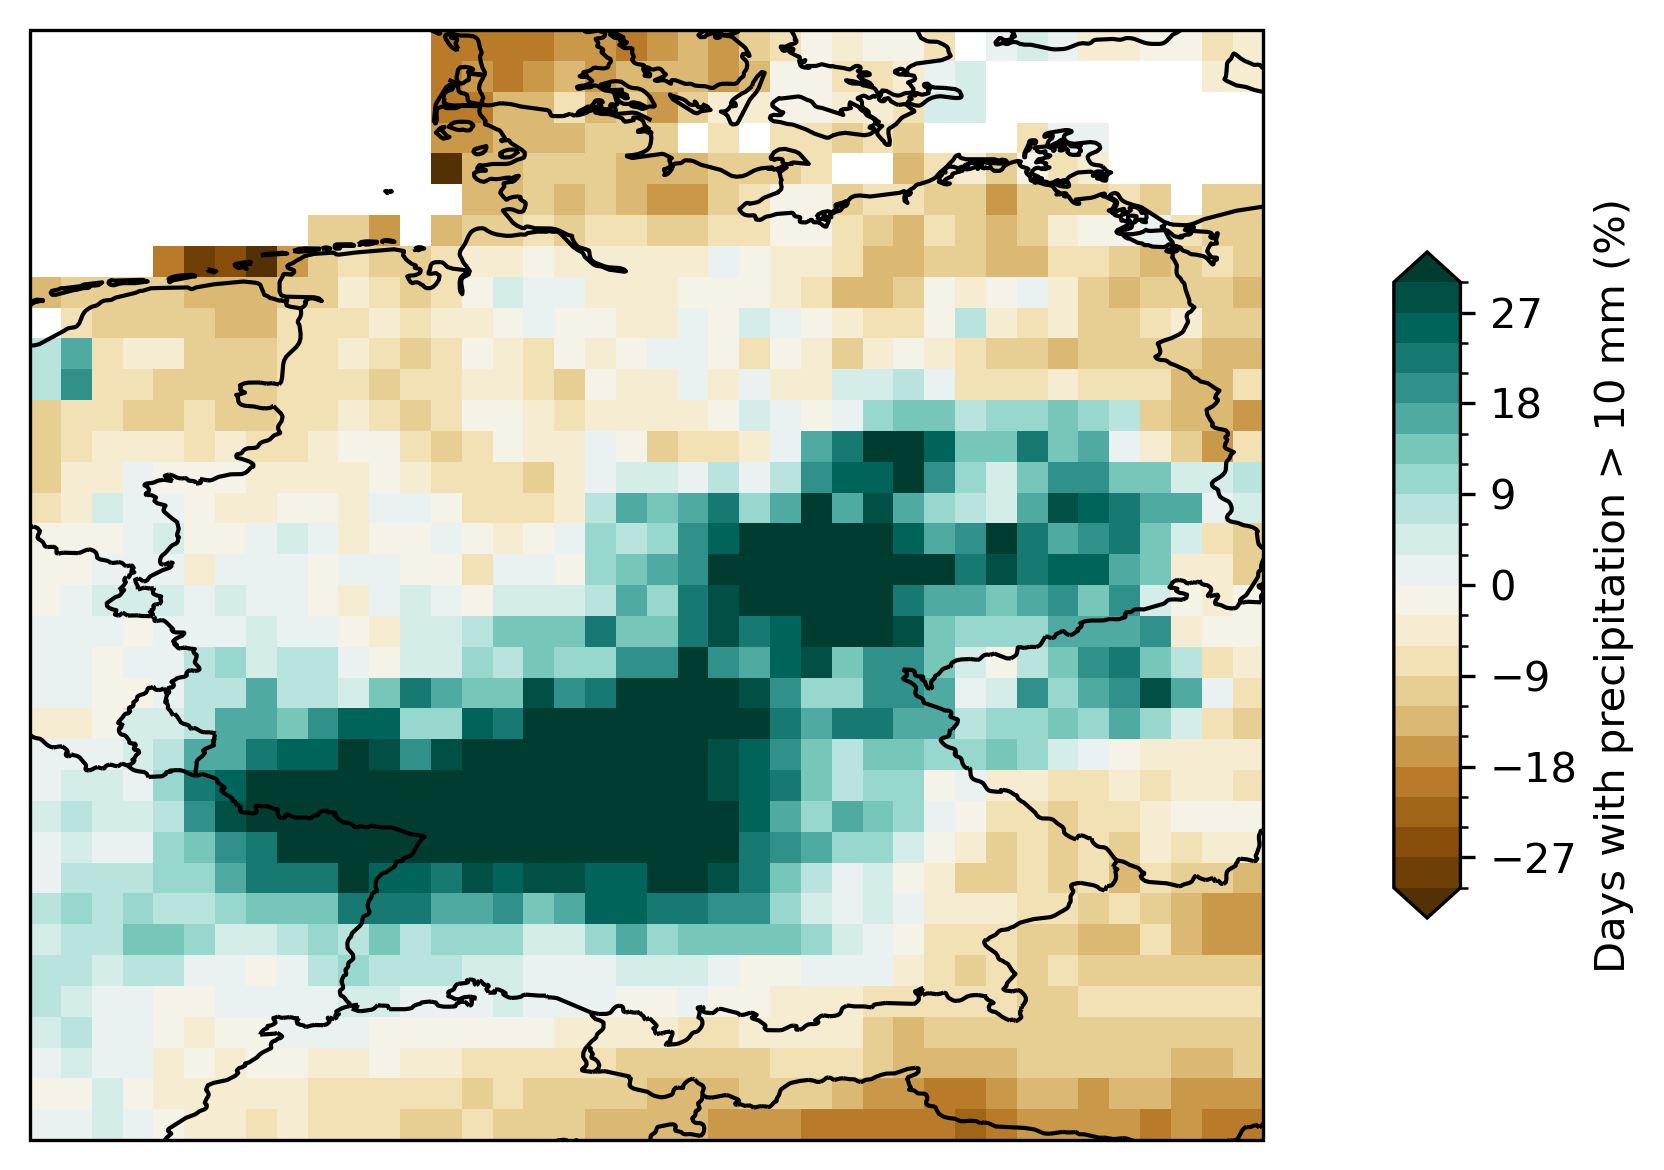

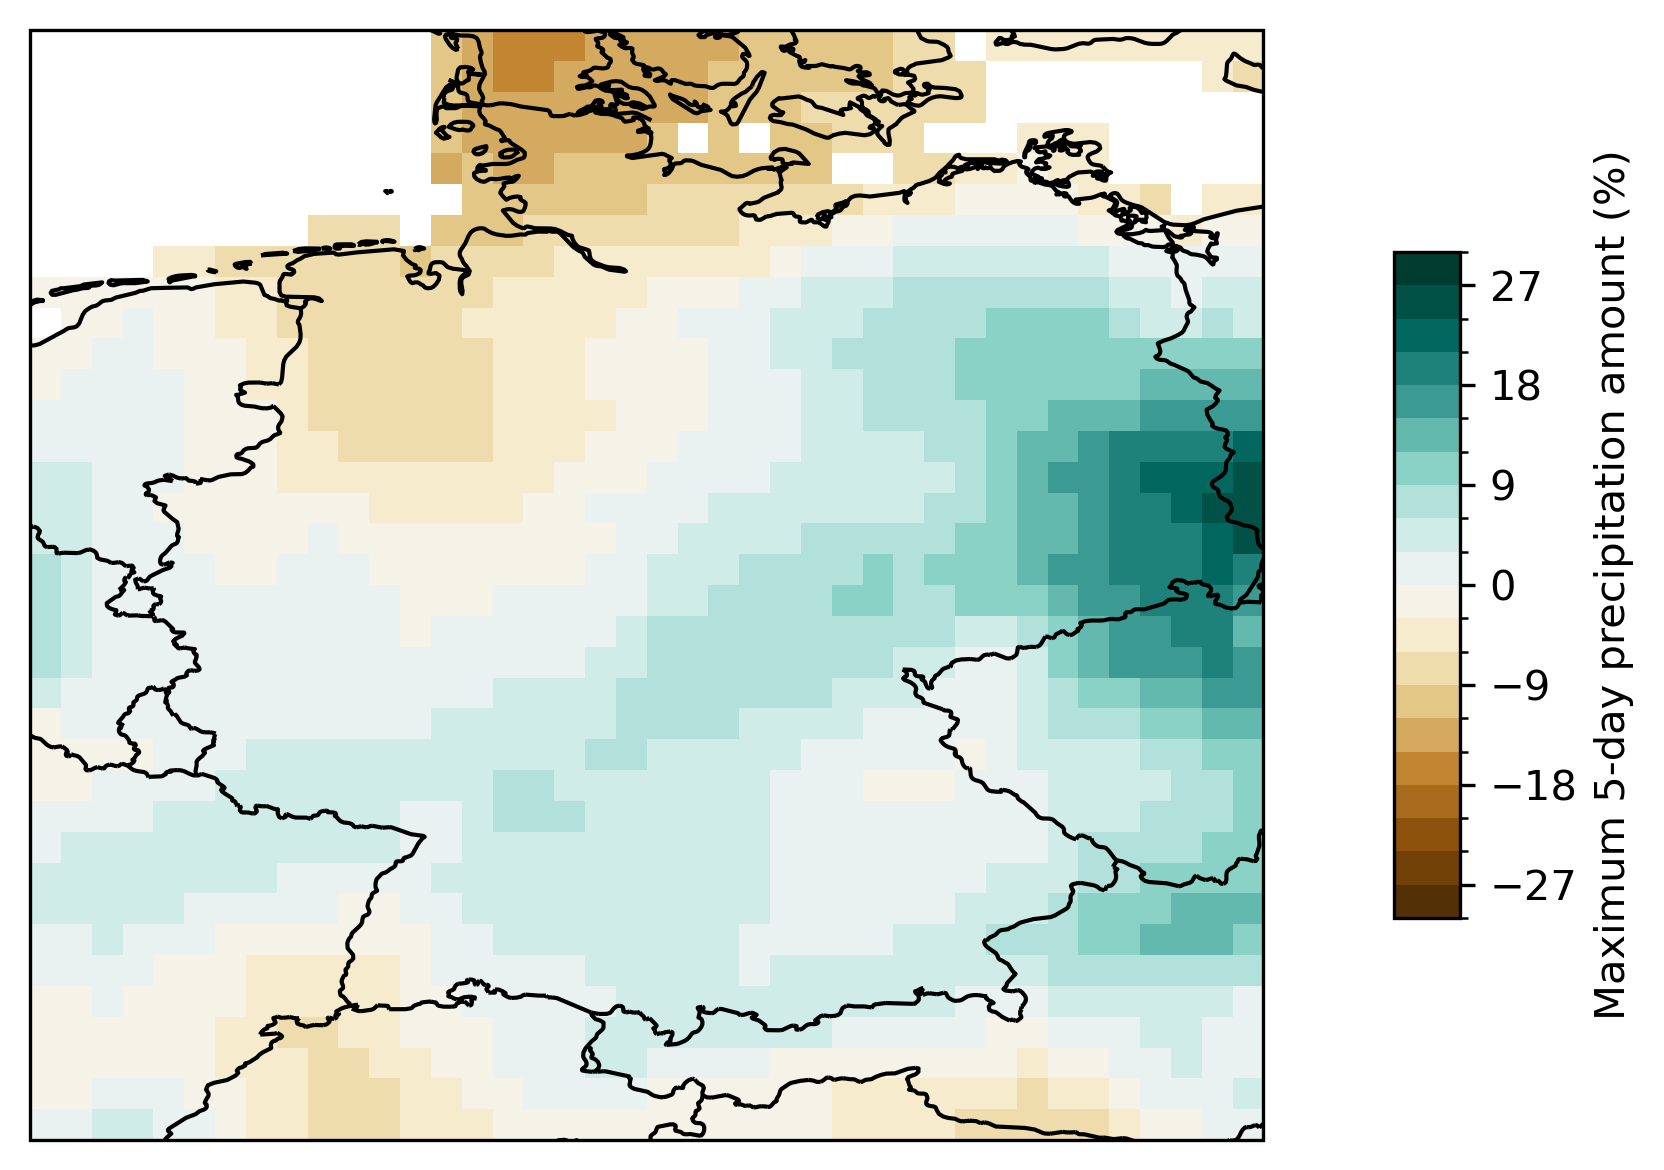

In [ ]:
save_folder = '../figures/maps/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

# Choose model scenario and area

data_folder = '../climatic_indices/'
area_name = 'germany'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']

for model_scenario_name in model_scenario_names:
    clim_idx = xr.open_mfdataset(data_folder+'*_'+area_name+'_'+model_scenario_name+'_downscaled.nc', decode_timedelta=False)
    clim_idx.load()

    # Choose variables

    #variable_list = list(clim_idx.keys())
    variable_list=['R10mm', 'RX5day']
    reldiff = 'True'
    if reldiff == 'True':
        level_list = [30, 30]
        label_list = ['Days with precipitation > 10 mm (%)', 'Maximum 5-day precipitation amount (%)']
    else:
        level_list = [10, 10]
        label_list = ['Days with precipitation > 10 mm (days)', 'Maximum 5-day precipitation amount (mm)']

    # Plotting

    for variable, lmax, label in zip(variable_list, level_list, label_list):
        levels = np.linspace(-lmax, lmax, 21)
        fig = plt.figure(figsize=[9, 4], dpi=300)
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        diff = clim_idx[variable].isel(time=slice(25,45)).mean("time") - clim_idx[variable].isel(time=slice(0,20)).mean("time")
        if area_name == 'europe':
            diff = diff.reindex({'lon':np.arange(0, 360, clim_idx.lon[1]-clim_idx.lon[0])})
            ax.set_xlim([-15, 18])
        if reldiff == 'True':
            diff = diff/ clim_idx[variable].isel(time=slice(0,20)).mean("time") * 100
        map = diff.plot(ax=ax, 
                    transform=ccrs.PlateCarree(),levels=levels, cmap='BrBG',
                    cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':label})
        ax.coastlines()
        ax.add_feature(cFeature.BORDERS)
        """
        import cartopy.io.shapereader as shpreader
        shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
        reader = shpreader.Reader(shpfilename)
        countries = reader.records()

        for country in countries:
            if country.attributes['SOVEREIGNT'] == 'Germany':
                print('hello germany!')
            else:
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),zorder=10,
                          facecolor=(1, 1, 1))
        """
        ax.spines[['right','top']].set_visible(False)
        fig.tight_layout()
        if reldiff == 'True':
            plt.savefig(save_folder+'reldiff_'+variable+'_'+area_name+'_'+model_scenario_name+'_downscaled.png')
        else:
            plt.savefig(save_folder+'diff_'+variable+'_'+area_name+'_'+model_scenario_name+'_downscaled.png')
        plt.show()
